# Role of Decay Function

# Himmelbau's Function

/Users/rajit906/Downloads/PhD/PhD_Research/Current/Kinetic_Descent/toy/kd_ub.py:50: RuntimeWarning: invalid value encountered in divide
  F_tilde, p_tilde = F/nF, p/np.sqrt(c)


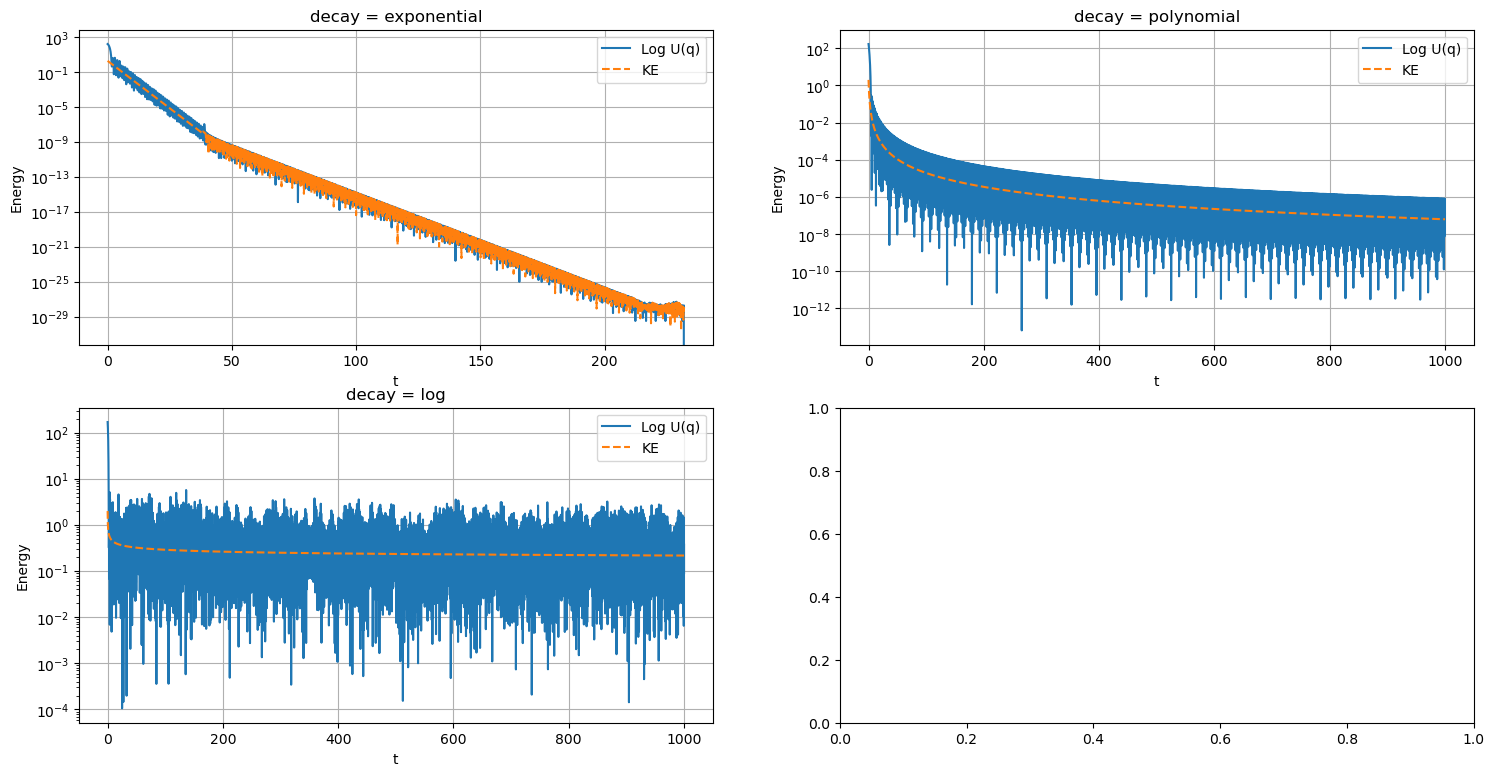

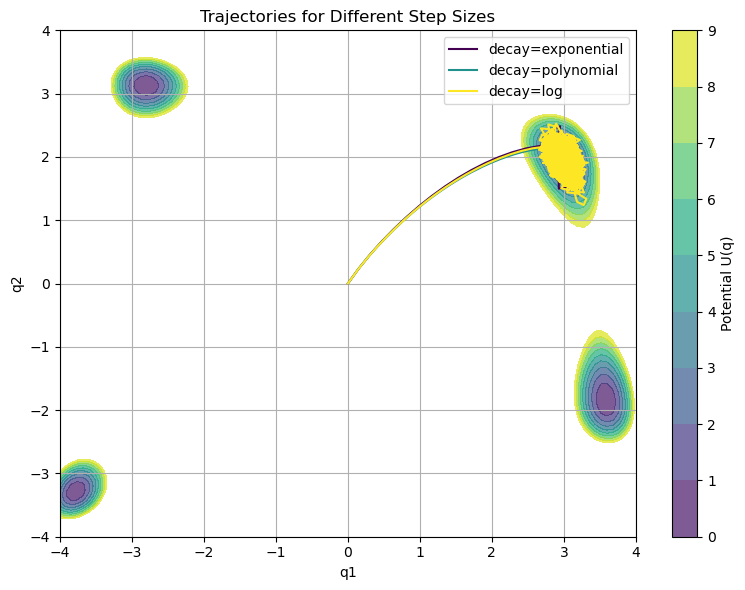

In [2]:
from kd_ub import kd_traj
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
Pars = {}
Model = {}

# Himmelblau function
U = lambda x, P: (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

# Potential function for contour plots
potential_lambda = lambda X, Y: (X**2 + Y - 11)**2 + (X + Y**2 - 7)**2

# Negative gradient (force function)
F = lambda x, P: np.array([
    - 2 * (x[0]**2 + x[1] - 11) * (2 * x[0]) - 2 * (x[0] + x[1]**2 - 7),
    - 2 * (x[0]**2 + x[1] - 11) - 2 * (x[0] + x[1]**2 - 7) * (2 * x[1])
])

Model['U'] = U
Model['F'] = F

# Step sizes to test
decays = ['exponential', 'polynomial', 'log']
T_final = 1000  # Keep total simulation time fixed
trajectories = {}
h = 0.1
Ns = int(T_final / h)

# Compute trajectories for each step size
for decay in decays:
    x0 = np.array([0., 0.])
    p0 = F(x0, Pars)
    p0 /= np.linalg.norm(p0)
    p0 *= np.sqrt(2)
    if decay == "exponential":
        Pars['gamma'] = 0.5
        decay_func = {
        'c': lambda t, P: np.exp(-P['gamma'] * t),
        'cp': lambda t, P: -P['gamma'] * np.exp(-P['gamma'] * t),
        'csqrt': lambda t, P: np.sqrt(np.exp(-P['gamma'] * t))
    }
        # Previous implementation with power-law decay
        #c = c_init * (1 + t) ** -gamma
        #cp = -gamma * c_init * (1 + t) ** -(gamma + 1)
    elif decay == "polynomial":
        Pars['gamma'] = 2.5
        decay_func = {
        'c': lambda t, P: (1+t)**-P['gamma'],
        'cp': lambda t, P: -P['gamma'] * (1+t)**(-P['gamma']+1),
        'csqrt': lambda t, P: np.sqrt((1+t)**-P['gamma'])
    }
    elif decay == "log":
        #c = c_init / np.log(np.e + gamma * t)  # New logarithmic decay function
        #cp = -c_init * gamma / ((np.log(np.e + gamma * t))**2 * (np.e + gamma * t))  # Derivative of the new function
        Pars['gamma'] = 10
        decay_func = {
        'c': lambda t, P: 1/np.log(np.e + P['gamma'] * t),
        'cp': lambda t, P: -P['gamma'] / ((np.log(np.e + P['gamma'] * t))**2 * (np.e + P['gamma'] * t)),
        'csqrt': lambda t, P: np.sqrt(1/np.log(np.e + P['gamma'] * t))
    }
    Pars['decay'] = decay_func

    T, X, P, KE, PE = kd_traj(x0, p0, h, Ns, Pars, Model)
    trajectories[decay] = (T, X, P, KE, PE)

# Plot all trajectories on a single contour plot
fig, axs = plt.subplots(2, 2, figsize=(18, 9))

x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X_grid, Y_grid = np.meshgrid(x, y)
Z = (X_grid**2 + Y_grid - 11)**2 + (X_grid + Y_grid**2 - 7)**2

fig_contour, ax_contour = plt.subplots(figsize=(8, 6))
contourf = ax_contour.contourf(X_grid, Y_grid, Z, levels=np.linspace(0, 9, 10), cmap='viridis', alpha=0.7)
fig.colorbar(contourf, ax=ax_contour, label='Potential U(q)')

# Plot each trajectory
colors = plt.cm.viridis(np.linspace(0, 1, len(decays)))
for i, decay in enumerate(decays):
    _, X, _, _, _ = trajectories[decay]
    ax_contour.plot(X[:, 0], X[:, 1], label=f'decay={decay}', color=colors[i], lw=1.5)

ax_contour.set_xlabel('q1')
ax_contour.set_ylabel('q2')
ax_contour.set_title('Trajectories for Different Step Sizes')
ax_contour.legend()
ax_contour.grid(True)

# Plot log potential and kinetic energy in a 2x4 grid
for i, decay in enumerate(decays):
    T, _, _, KE, PE = trajectories[decay]

    row, col = divmod(i, 2)

    # Log potential energy plot
    axs[row, col].semilogy(T, PE, label='Log U(q)')
    axs[row, col].semilogy(T, KE, label='KE', linestyle='dashed')
    #axs[row, col].semilogy(T, 2 * np.exp(-gamma * T), label='Desired KE', color='green', linestyle='dotted')

    axs[row, col].set_title(f'decay = {decay}')
    axs[row, col].set_xlabel('t')
    axs[row, col].set_ylabel('Energy')
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()
